In [1]:
import os
import pandas as pd
excel_names=[]
for excel_name in os.listdir("./data"):
    excel_names.append(excel_name)

df_list=[]
for excel_name in excel_names:
    filename="./data/{}".format(excel_name)
    df=pd.read_csv(filename,sep=",")
    df_list.append(df)
df_merge=pd.concat(df_list)
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7850 entries, 0 to 233
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   日期      7850 non-null   object 
 1   类目名称    7850 non-null   object 
 2   买家数     7850 non-null   int64  
 3   成交金额    7850 non-null   int64  
 4   搜索人数    7850 non-null   int64  
 5   成交金额占比  7850 non-null   object 
 6   成交金额同比  7850 non-null   object 
 7   成交人数占比  7850 non-null   object 
 8   成交人数同比  7850 non-null   object 
 9   客单价     7850 non-null   float64
 10  UV价值    7850 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 735.9+ KB


In [2]:
new_date=df_merge['日期'].str.split("|", n = 1, expand = True) 
df_merge['开始日期']=new_date[0]
df_merge['结束日期']=new_date[1]
df_merge['开始日期']=pd.to_datetime(df_merge['开始日期'].astype(str),format='%Y-%m-%d')
df_merge['结束日期']=pd.to_datetime(df_merge['结束日期'].astype(str),format='%Y-%m-%d')
del df_merge['日期'] 
df_merge.set_index(df_merge['开始日期'])

,类目名称,买家数,成交金额,搜索人数,成交金额占比,成交金额同比,成交人数占比,成交人数同比,客单价,UV价值,开始日期,结束日期
开始日期,,,,,,,,,,,,
2017-10-01,手机保护套/壳,27524495,503205377,82138973,38.16%,70.34%,52.07%,11.20%,18.28,6.13,2017-10-01,2017-10-31
2017-10-01,手机贴膜,18384095,190704104,26656100,11.79%,28.26%,25.05%,16.74%,10.37,7.15,2017-10-01,2017-10-31
2017-10-01,手机零部件,2125787,189281648,15767938,11.72%,12.75%,5.28%,11.70%,89.04,12.00,2017-10-01,2017-10-31
2017-10-01,移动电源,2801112,188888518,14276910,11.70%,27.56%,7.22%,11.89%,67.43,13.23,2017-10-01,2017-10-31
2017-10-01,手机数据线,4178627,153248705,10788473,8.04%,68.09%,11.07%,22.33%,36.67,14.20,2017-10-01,2017-10-31
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-01,分压盒,1,2425,36,-,1488.67%,-,68.95%,2425.00,67.36,2020-09-01,2020-09-30
2020-09-01,白平衡镜,1,1826,56,-,-46.39%,-,11.19%,1826.00,32.61,2020-09-01,2020-09-30
2020-09-01,Lomo潜水盒,1,133,22,-,-90.94%,-,-72.61%,133.00,6.05,2020-09-01,2020-09-30


### 查看数据分布情况

In [4]:
numerical_columns = [col for col in df.columns if (df[col].dtype=='int64' or df[col].dtype=='float64')]
df_merge[numerical_columns].describe().loc[['min','max', 'mean','50%'],:]

,买家数,成交金额,搜索人数,客单价,UV价值
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
max,2.752450e+07,5.032054e+08,8.213897e+07,86194.000000,7590.750000
mean,3.392833e+05,1.185596e+07,6.887382e+05,350.829666,33.409064
50%,6.180000e+03,8.422605e+05,4.307200e+04,108.990000,19.940000


### 查看百分比

In [14]:
df_merge["成交金额"].sum()
# df_merge["成交金额"][df_merge["类目名称"]=='手机贴膜'].sum()

93069274131

In [26]:
percentages = []
for item in list(df_merge["类目名称"].unique()):
    
    p = round((df_merge["成交金额"][df_merge["类目名称"]==item].sum()/df_merge["成交金额"].sum())*100 , 2)
    value=[item,p]
    percentages.append(value)
    print(item,"(% to exit) : ", p)

手机保护套/壳 (% to exit) :  15.78
手机贴膜 (% to exit) :  8.0
手机零部件 (% to exit) :  7.18
移动电源 (% to exit) :  7.33
手机数据线 (% to exit) :  5.92
笔记本零部件 (% to exit) :  2.49
手机电池 (% to exit) :  2.97
数据线 (% to exit) :  2.76
手机充电器 (% to exit) :  4.32
平板电脑保护套/壳 (% to exit) :  3.58
手机支架/手机座 (% to exit) :  3.74
其它配件 (% to exit) :  1.97
笔记本电脑包 (% to exit) :  1.42
影室灯 (% to exit) :  1.73
普通干电池 (% to exit) :  1.31
云台 (% to exit) :  1.8
自拍杆/架 (% to exit) :  0.88
脚架 (% to exit) :  0.71
背景布类 (% to exit) :  1.02
摄像机配件 (% to exit) :  0.57
遥控设备 (% to exit) :  0.9
笔记本电池 (% to exit) :  0.82
纽扣电池 (% to exit) :  0.68
笔记本电源 (% to exit) :  0.58
手机镜头 (% to exit) :  1.03
通用电池充电套装 (% to exit) :  0.44
USB HUB/转换器 (% to exit) :  0.87
数码相机包 (% to exit) :  0.47
笔记本炫彩贴 (% to exit) :  0.58
平板电脑零部件 (% to exit) :  0.36
读卡器 (% to exit) :  0.26
摄影棚 (% to exit) :  0.38
数码收纳整理包 (% to exit) :  0.46
耳机保护套 (% to exit) :  1.16
滤镜 (% to exit) :  0.33
平板电脑屏幕贴膜 (% to exit) :  0.35
笔记本键盘保护膜 (% to exit) :  0.26
苹果视频线/转换线 (% to exit) :  0.34
手写笔 

In [28]:
percentages[:10]

[['手机保护套/壳', 15.78],
 ['手机贴膜', 8.0],
 ['手机零部件', 7.18],
 ['移动电源', 7.33],
 ['手机数据线', 5.92],
 ['笔记本零部件', 2.49],
 ['手机电池', 2.97],
 ['数据线', 2.76],
 ['手机充电器', 4.32],
 ['平板电脑保护套/壳', 3.58]]

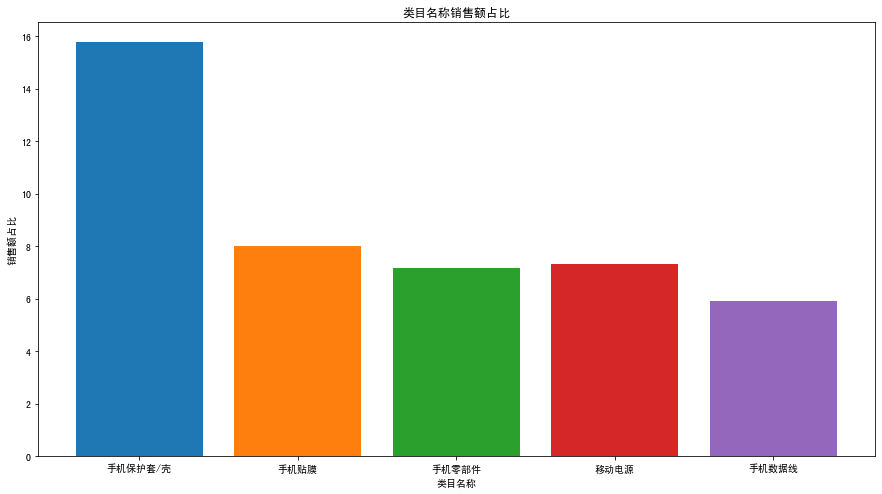

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15, 8))
plt.bar(0, percentages[0])
plt.bar(1, percentages[1])
plt.bar(2, percentages[2])
plt.bar(3, percentages[3])
plt.bar(4, percentages[4])
plt.xticks((0,1,2,3,4), ('手机保护套/壳','手机贴膜','手机零部件','移动电源','手机数据线'))
plt.xlabel("类目名称")
plt.ylabel("销售额占比")
plt.title("类目名称销售额占比")
plt.show()

In [ ]:
# result=df_merge[(df_merge["类目名称"]=="手机贴膜")]
df_test=df_merge.loc[:,["买家数","成交金额"]]
df_test.plot.scatter(x = '买家数', y = '成交金额')


In [ ]:
result=df_merge[(df_merge["类目名称"]=="手机贴膜")|(df_merge["类目名称"]=="手机零部件")|(df_merge["类目名称"]=="移动电源")]
result.set_index(result.开始日期)
result.info()
result.boxplot(column="买家数",by="类目名称",figsize=(9,6))

In [ ]:
result.head(10).boxplot(column="买家数",by="类目名称",figsize=(9,7))

In [ ]:
from pyecharts import options as opts
from pyecharts.charts import Line

(
    Line()
    .set_global_opts(
        tooltip_opts=opts.TooltipOpts(is_show=True),
        xaxis_opts=opts.AxisOpts(type_="category"),
        yaxis_opts=opts.AxisOpts(
            type_="value",
            axistick_opts=opts.AxisTickOpts(is_show=True),
            splitline_opts=opts.SplitLineOpts(is_show=True),
        ),
    )
    .add_xaxis(xaxis_data=result.开始日期.dt.strftime("%Y-%m-%d").to_list())
    .add_yaxis(
        series_name="买家数",
        y_axis=result["买家数"],
        symbol="emptyCircle1",
        is_symbol_show=True,
        label_opts=opts.LabelOpts(is_show=False),
    )
    .add_yaxis(
        series_name="搜索人数",
        y_axis=result["搜索人数"],
        symbol="emptyCircle2",
        is_symbol_show=True,
        label_opts=opts.LabelOpts(is_show=False),
    )
    .render_notebook()
)